# Libraries

In [1]:
from nltk.corpus import stopwords
import nltk
# from nltk import pos_tag, word_tokenize

In [5]:
# basic operations
import os
import re
#import time

# utilities
#from pprint import pprint as pp

# data analysis/management/manipulation
import numpy as np
import pandas as pd
#import sklearn

# text analysis
import gensim
from gensim.models import LdaModel, ldamodel
from gensim.models import LsiModel, lsimodel
from gensim.models import Phrases
from gensim.models import CoherenceModel  
from gensim.corpora import Dictionary
from gensim.similarities import MatrixSimilarity
'''
Uncomment the next two lines of code if you don't have a copy of the
Mallet software installed in your machine
'''
# ! wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip # * update if needed *
# ! unzip mallet-2.0.8.zip
import spacy
import en_core_web_lg


# visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pyLDAvis
import pyLDAvis.gensim

In [1]:
# data analysis/management/manipulation
import numpy as np
import pandas as pd
#import sklearn
# visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import pyLDAvis
#import pyLDAvis.gensim

In [3]:
# data vis
%matplotlib inline

# send output to the screen
LINE = ''.join(['\n', 79 * '-', '\n'])

In [4]:
df['docs_phrases']=np.array(DOCS_PHRASED)
df.to_csv("forum with phrases.csv")

NameError: name 'DOCS_PHRASED' is not defined

# Load data

In [8]:
## Read in the scraped data
df = pd.read_csv("forumdata.csv")

In [7]:
df['body'].isnull().count() == len(df['body'])

True

In [8]:
df['date'].isnull().count() == len(df['date'])

True

In [9]:
df.dropna(subset = ["body"], inplace=True)

In [10]:
df.fillna('\n Sun, 02/05/2017 - 14:25\n', inplace=True)

In [11]:
df.drop_duplicates(subset = ["body"], keep='first',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 1301
Data columns (total 4 columns):
name     1287 non-null object
date     1287 non-null object
title    1287 non-null object
body     1287 non-null object
dtypes: object(4)
memory usage: 50.3+ KB


In [57]:
df

,name,date,title,body
0,Spaceangel,"\n Sun, 02/05/2017 - 14:25\n",Scooter chargers ~ in general & NFPA/NEC,I have lived in a number of places in this won...
1,"Orphee,MEroller,Orphee,Orphee,pcarlson1979,Jac...","\n Wed, 06/20/2012 - 09:11\n ...","3500W hub motor, question about real power and...","Hi all,I have a (small) problem on my electric..."
2,IFIMotors,"\n Tue, 06/12/2018 - 07:06\n",NEW SEVCON GEN 4 80V FOR Sale,"hello,\ni have new Sevcon controllers for sale..."
4,"gatorsby7,power-up,Pinche","\n Tue, 11/01/2011 - 10:24\n ...",how does 24v 4-wire reversible motor work?,i have a mobility scooter (JP Cruiser - HCF305...
5,"tilt2468,reikiman,antiscab,tilt2468,tilt2468,m...","\n Thu, 06/11/2009 - 19:03\n ...",Lithium safety for an e-bike,I am getting some severe warnings on an e-bike...
...,...,...,...,...
1297,"ElectroLex,azvectrix,ElectroLex,azvectrix,Don ...","\n Tue, 03/27/2012 - 14:35\n ...",Any east coasters/southeast/mid atlantic folks...,I'm in the Raleigh-Durham-Chapel Hill area of ...
1298,"Spaceangel,Johnny J,Spaceangel","\n Fri, 08/16/2013 - 11:30\n ...",Battery Ohm Meters,"Testing of Battery packs and modules.,OHM METE..."
1299,reikiman,"\n Thu, 11/14/2013 - 12:08\n",Clipper Creek announces LCS-25 EVSE w/ pre-wir...,The expense of buying a home charging station ...
1300,Webmaster,"\n Wed, 12/11/2013 - 12:18\n",Clipper Creek new inexpensive charging station...,What's important about this one is that it's v...


## extract year

In [13]:
df['date']=df.date.astype(str)
df.loc[:, 'date'] = df['date'].str.replace('\n', '')

In [14]:
year1=[i.split('/')[2] for i in df.date]
year=[i.split(' -')[0] for i in year1]

In [15]:
set(year)

{'2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020'}

In [16]:
df['year']=np.array(year)

In [17]:
df.reset_index(inplace=True)

In [18]:
df=df.drop(['date','index'],axis=1)

In [19]:
df

,name,title,body,year
0,Spaceangel,Scooter chargers ~ in general & NFPA/NEC,I have lived in a number of places in this won...,2017
1,"Orphee,MEroller,Orphee,Orphee,pcarlson1979,Jac...","3500W hub motor, question about real power and...","Hi all,I have a (small) problem on my electric...",2012
2,IFIMotors,NEW SEVCON GEN 4 80V FOR Sale,"hello,\ni have new Sevcon controllers for sale...",2018
3,"gatorsby7,power-up,Pinche",how does 24v 4-wire reversible motor work?,i have a mobility scooter (JP Cruiser - HCF305...,2011
4,"tilt2468,reikiman,antiscab,tilt2468,tilt2468,m...",Lithium safety for an e-bike,I am getting some severe warnings on an e-bike...,2009
...,...,...,...,...
1282,"ElectroLex,azvectrix,ElectroLex,azvectrix,Don ...",Any east coasters/southeast/mid atlantic folks...,I'm in the Raleigh-Durham-Chapel Hill area of ...,2012
1283,"Spaceangel,Johnny J,Spaceangel",Battery Ohm Meters,"Testing of Battery packs and modules.,OHM METE...",2013
1284,reikiman,Clipper Creek announces LCS-25 EVSE w/ pre-wir...,The expense of buying a home charging station ...,2013
1285,Webmaster,Clipper Creek new inexpensive charging station...,What's important about this one is that it's v...,2013


# Data pre-processing

In [21]:
# remove returns
df.loc[:, 'body'] = df['body'].str.replace('\n', '')

In [22]:
# remove punctuation
df['body'] = df['body'].str.replace('[^\\w\\s]','')

In [23]:
# lower casing
df['body'] = df['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [28]:
## stopwords
stop = stopwords.words('english')

stop.extend(["ev","electric","hybrid","car","vehicle","bike","cars","vehicles","scooter" ,"cycle","good","thing"])

df["body"] = df["body"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [29]:
# list of abstract
DOCS = [body.strip().lower() for body in df.body]

# hyphen to underscores
DOCS = [re.sub(r'\b-\b', '_', text) for text in DOCS]

# Spacy pipeline

In [30]:
nlp = spacy.load('en_core_web_lg')

In [31]:
# lemmatization

DOCS_TOKENS, TMP_TOKENS = [], []

for doc in DOCS:
    TMP_TOKENS=[token.lemma_ for token in nlp(doc) 
                  if not token.is_stop
                  and not token.is_space
                  and not token.is_punct
                  and not token.like_num
                  and not token.is_oov
                  and len(token.lemma_) > 1]
    DOCS_TOKENS.append(TMP_TOKENS)
    TMP_TOKENS=[]

## Take into account bi- and tri-grams

In [32]:
# get rid of common terms
COMMON_TERMS = [u'of', u'with', u'without', u'and', u'or', u'the', u'a',
                u'not', 'be', u'to', u'this', u'who', u'in']

# find phrases
BIGRAM = Phrases(DOCS_TOKENS,
                 min_count=50,
                 threshold=5,
                 max_vocab_size=50000,
                 common_terms=COMMON_TERMS)

TRIGRAM = Phrases(BIGRAM[DOCS_TOKENS],
                  min_count=50,
                  threshold=5,
                  max_vocab_size=50000,
                  common_terms=COMMON_TERMS)

# uncomment if bi-grammed, tokenized document is preferred
# DOCS_PHRASED = [BIGRAM[line] for line in DOCS_TOKENS]
DOCS_PHRASED = [TRIGRAM[BIGRAM[line]] for line in DOCS_TOKENS]

# check nlp pipeline
#print('',
#      'Tokenized:', DOCS_TOKENS[0],
#      'Tri-grammed tokenised:', DOCS_PHRASED[0],
#      sep=LINE, end=LINE)

# Topic modeling

## Model building

### Text transformation

In [33]:
DICT = Dictionary(DOCS_PHRASED)
CORPUS = [DICT.doc2bow(doc) for doc in DOCS_PHRASED]

In [34]:
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'D:/BAmaster/mallet-2.0.8'
MALLET_PATH= 'D:/BAmaster/mallet-2.0.8/bin/mallet.bat'

##  Model evaluation

### Get range of coherence values as the number of retained topics change

In [35]:
# define function
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    -----------
    dictionary : Gensim dictionary
    corpus     : Gensim corpus
    texts      : List of input texts
    limit      : Max number of topics

    Returns:
    --------
    model_list       : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model
                       with respective number of topics
    """
    coherence_values = []
    model_list = []
    mallet_path = MALLET_PATH
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path,
                                                 corpus=corpus,
                                                 num_topics=num_topics,
                                                 id2word=dictionary,
                                                 random_seed=123)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [73]:
# collect coherence scores as the number of retained topics change
LIMIT, START, STEP = 20, 1, 1
MODEL_LIST, COHER_VALS = compute_coherence_values(dictionary=DICT,
                                                  corpus=CORPUS,
                                                  texts=DOCS_PHRASED,
                                                  start=START,
                                                  limit=LIMIT,
                                                  step=STEP)

In [74]:
COHER_VALS

[0.3408082983905028,
 0.39556699492543745,
 0.3806115802515353,
 0.41110181001523544,
 0.46221689035570784,
 0.4792771513434682,
 0.44074904828596384,
 0.4271333441006549,
 0.4558936650330893,
 0.4282837334203563,
 0.4407382740267625,
 0.45673808151523526,
 0.46180297060143904,
 0.44651912276075645,
 0.4518152462505685,
 0.455341477549128,
 0.4676102621171287,
 0.4592888212542738,
 0.4480217489632556]

In [2]:
COHER_VALS=[0.3408082983905028,
 0.39556699492543745,
 0.3806115802515353,
 0.41110181001523544,
 0.46221689035570784,
 0.4792771513434682,
 0.44074904828596384,
 0.4271333441006549,
 0.4558936650330893,
 0.4282837334203563,
 0.4407382740267625,
 0.45673808151523526,
 0.46180297060143904,
 0.44651912276075645,
 0.4518152462505685,
 0.455341477549128,
 0.4676102621171287,
 0.4592888212542738,
 0.4480217489632556]

In [75]:
max(COHER_VALS)

0.4792771513434682

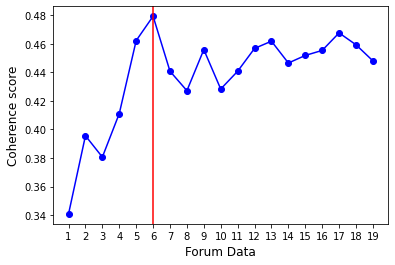

In [5]:
# plot collected coherence scores data

# data series
X = range(1, 20, 1)
Y = COHER_VALS

# create figure
FIG = plt.figure(figsize=(6, 4))
AX = FIG.add_subplot(1, 1, 1)

# plot data
AX.plot(X, Y, marker='o', color='b', ls='-')

# axes
AX.set_xlabel("Forum Data",size=12)
AX.set_ylabel("Coherence score",size=12)

#IMP
AX.set_xticks(np.arange(1, 20, 1))

# reference line
AX.axvline(x=6, ymin=0, ymax=1, color='r')

# grid
#AX.grid(True, ls='--')

# save plot to file
#CWD = CWD
#FOLDER = 'exhibits/appxB'
#FILE = 'B_0.pdf'

plt.savefig('forum_cohere.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

plt.show()

In [35]:
plt.savefig("tm for forumdata",
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

<Figure size 432x288 with 0 Axes>

In [36]:
# suggested number of topics to retain -- see above
N_TOPICS = 6

# model estimation
LDA_MALLET = gensim.models.wrappers.LdaMallet(MALLET_PATH,
                                              corpus=CORPUS,
                                              num_topics=N_TOPICS,
                                              id2word=DICT,
                                              random_seed=123)

# print results
#LDA_MALLET.print_topics(num_topics=N_TOPICS, num_words=10)

In [25]:
LDA_MALLET.print_topics(num_topics=N_TOPICS, num_words=10)

[(0,
  '0.037*"wire" + 0.017*"switch" + 0.017*"light" + 0.015*"connect" + 0.014*"connector" + 0.013*"plug" + 0.010*"work" + 0.009*"end" + 0.008*"connection" + 0.008*"power"'),
 (1,
  '0.016*"energy" + 0.009*"year" + 0.009*"system" + 0.008*"power" + 0.008*"people" + 0.007*"cost" + 0.007*"company" + 0.007*"large" + 0.006*"lithium" + 0.005*"product"'),
 (2,
  '0.089*"battery" + 0.077*"charge" + 0.073*"cell" + 0.068*"charger" + 0.032*"pack" + 0.025*"bms" + 0.024*"voltage" + 0.012*"discharge" + 0.010*"balance" + 0.010*"parallel"'),
 (3,
  '0.087*"battery" + 0.043*"pack" + 0.015*"range" + 0.014*"ah" + 0.014*"lifepo4" + 0.013*"buy" + 0.012*"ride" + 0.012*"mile" + 0.010*"36v" + 0.010*"48v"'),
 (4,
  '0.091*"motor" + 0.063*"controller" + 0.023*"speed" + 0.012*"run" + 0.012*"throttle" + 0.012*"work" + 0.011*"power" + 0.009*"brake" + 0.009*"mph" + 0.009*"drive"'),
 (5,
  '0.038*"voltage" + 0.037*"volt" + 0.034*"current" + 0.028*"amp" + 0.023*"power" + 0.021*"high" + 0.014*"load" + 0.013*"watt" + 

In [78]:
LDA_MALLET.print_topics(num_topics=N_TOPICS, num_words=10)

[(0,
  '0.037*"wire" + 0.017*"switch" + 0.017*"light" + 0.015*"connect" + 0.014*"connector" + 0.013*"plug" + 0.010*"work" + 0.009*"end" + 0.008*"connection" + 0.008*"power"'),
 (1,
  '0.016*"energy" + 0.009*"year" + 0.009*"system" + 0.008*"power" + 0.008*"people" + 0.007*"cost" + 0.007*"company" + 0.007*"large" + 0.006*"lithium" + 0.005*"product"'),
 (2,
  '0.089*"battery" + 0.077*"charge" + 0.073*"cell" + 0.068*"charger" + 0.032*"pack" + 0.025*"bms" + 0.024*"voltage" + 0.012*"discharge" + 0.010*"balance" + 0.010*"parallel"'),
 (3,
  '0.087*"battery" + 0.043*"pack" + 0.015*"range" + 0.014*"ah" + 0.014*"lifepo4" + 0.013*"buy" + 0.012*"ride" + 0.012*"mile" + 0.010*"36v" + 0.010*"48v"'),
 (4,
  '0.091*"motor" + 0.063*"controller" + 0.023*"speed" + 0.012*"run" + 0.012*"throttle" + 0.012*"work" + 0.011*"power" + 0.009*"brake" + 0.009*"mph" + 0.009*"drive"'),
 (5,
  '0.038*"voltage" + 0.037*"volt" + 0.034*"current" + 0.028*"amp" + 0.023*"power" + 0.021*"high" + 0.014*"load" + 0.013*"watt" + 

### Result visualization with pyLDAvis

### Copy the training model weights from `Mallet` to `Gensim`

In [126]:
# translate topic modeling outcome
LDA_MALLET_G = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(LDA_MALLET)

In [ ]:
# ignore warnings coming from pyLDAvis
import warnings
warnings.filterwarnings('ignore')

# visualizing the outcome of the retained model -- this takes time
pyLDAvis.enable_notebook()
DATA_VIS = pyLDAvis.gensim.prepare(LDA_MALLET_G, CORPUS, DICT, sort_topics=False)
DATA_VIS

In [ ]:
# save pyLDAvis data to json file
pyLDAvis.save_json(DATA_VIS, 'topic_modelling_vis.json')

### Get term-to-topic probabilities

In [127]:
# get top 5 terms per topic
TOP_TERMS_LINE = LDA_MALLET_G.show_topics(num_topics=N_TOPICS, num_words=10)

In [ ]:
TOP_TERMS_LINE

In [128]:
# rearrange data on top 10 terms per topic
TOP_TERMS_M = []

for i in TOP_TERMS_LINE:
    topic_num = i[0]
    prob_terms = i[1].split('+')
    for term_sort, term in enumerate(prob_terms):
        weight = float(term.split('*')[0])
        term = term.split('*')[1].strip('"| ')
        TOP_TERMS_M.append([topic_num, term_sort, weight, term])

DF = pd.DataFrame(TOP_TERMS_M)

# rename columns
OLD_NAMES = [0, 1, 2, 3]
NEW_NAMES = ['topic_n', 'term_sort', 'weight', 'term']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF.rename(columns=COLS, inplace=True)
DF.set_index(['term_sort', 'topic_n'], inplace=True)
DF = DF.unstack()

# sidewaystable
DF_H = pd.DataFrame()

###################################################################range
for i in range(6):
    terms = DF['term'][i]
    weights = DF['weight'][i]
    weights = pd.Series(['( %s )' % j for j in weights ])
    DF_H = pd.concat([DF_H, terms, weights], axis=1)


# write data to file
#CWD = CWD
#FOLDER = 'exhibits'
#FILE = '_1.tex'
#DF_H.T.to_latex(os.path.join(CWD, FOLDER, FILE), index=True)

# DF_H.T.to_latex('1.tex', index=True)

In [129]:
DF_H.T

,0,1,2,3,4,5,6,7,8,9
0,wire,switch,light,connect,connector,plug,work,end,connection,power
0,( 0.037 ),( 0.017 ),( 0.017 ),( 0.015 ),( 0.014 ),( 0.013 ),( 0.01 ),( 0.009 ),( 0.008 ),( 0.008 )
1,energy,year,system,power,people,cost,company,large,lithium,product
0,( 0.016 ),( 0.009 ),( 0.009 ),( 0.008 ),( 0.008 ),( 0.007 ),( 0.007 ),( 0.007 ),( 0.006 ),( 0.005 )
2,battery,charge,cell,charger,pack,bms,voltage,discharge,balance,parallel
0,( 0.089 ),( 0.077 ),( 0.073 ),( 0.068 ),( 0.032 ),( 0.025 ),( 0.024 ),( 0.012 ),( 0.01 ),( 0.01 )
3,battery,pack,range,ah,lifepo4,buy,ride,mile,36v,48v
0,( 0.087 ),( 0.043 ),( 0.015 ),( 0.014 ),( 0.014 ),( 0.013 ),( 0.012 ),( 0.012 ),( 0.01 ),( 0.01 )
4,motor,controller,speed,run,throttle,work,power,brake,mph,drive
0,( 0.091 ),( 0.063 ),( 0.023 ),( 0.012 ),( 0.012 ),( 0.012 ),( 0.011 ),( 0.009 ),( 0.009 ),( 0.009 )


In [80]:
DF_H.T.to_latex('2.tex', index=True)

### Get document-to-topic probabilities

In [84]:
# get transformed corpus as per the LDA model
TRANSF_CORPUS = LDA_MALLET_G.get_document_topics(CORPUS)

# rearrange data on document-topic pairs probabilities
DOC_TOPIC_M = []

for id, doc in enumerate(TRANSF_CORPUS):
    for topic in np.arange(0, 6, 1):
        topic_n = doc[topic][0]
        topic_prob = doc[topic][1] 
        DOC_TOPIC_M.append([id, topic, topic_prob])

DF = pd.DataFrame(DOC_TOPIC_M)

# rename columns
OLD_NAMES = [0, 1, 2]
NEW_NAMES = ['doc_id', 'topic_n', 'prob']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF.rename(columns=COLS, inplace=True)

# dominant topic
GR = DF.groupby('doc_id')
DF.loc[:, 'max'] = GR['prob'].transform(np.max)
DF.loc[:, 'first_topic'] = 0
DF.loc[DF['prob'] == DF['max'], 'first_topic'] = 1
FIRST_TOPIC = DF.loc[DF['first_topic'] == 1]

# arrange data as contingency table
DF = DF.pivot_table(index='doc_id', columns='topic_n', values='prob', aggfunc=np.mean)

# write data to file
#CWD = CWD
#FOLDER = 'transformed_data'
#FILE = 'transformed_corpus.csv'
DF.to_csv('topic prob.csv', index=True)

In [82]:
DF

topic_n,0,1,2,3,4,5
doc_id,,,,,,
0,0.427424,0.129080,0.101780,0.059990,0.039755,0.241971
1,0.302375,0.055864,0.058224,0.123332,0.194436,0.265770
2,0.204994,0.169869,0.148773,0.156221,0.170332,0.149811
3,0.442193,0.067876,0.078619,0.098637,0.237191,0.075484
4,0.121644,0.266456,0.207951,0.298965,0.034187,0.070797
...,...,...,...,...,...,...
1282,0.079748,0.270782,0.177310,0.345274,0.049757,0.077128
1283,0.084149,0.101530,0.313303,0.213374,0.029683,0.257961
1284,0.283478,0.165951,0.138842,0.143910,0.078246,0.189573


# Analysis

## Wordclouds

In [37]:
tm_results = LDA_MALLET[CORPUS]

In [38]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [39]:
topics = [[(term, round(wt, 3))
           for term, wt in LDA_MALLET.show_topic(n, topn=20)]
          for n in range(0, LDA_MALLET.num_topics)]

In [40]:
topics_df = pd.DataFrame(
    [[term for term, wt in topic] for topic in topics],
    columns=['Term' + str(i) for i in range(1, 21)],
    index=['Topic ' + str(t) for t in range(1, LDA_MALLET.num_topics + 1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Term1,wire,energy,battery,battery,motor,voltage
Term2,switch,year,charge,pack,controller,volt
Term3,light,system,cell,range,speed,current
Term4,connect,power,charger,ah,run,amp
Term5,connector,people,pack,lifepo4,throttle,power


In [43]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame(
    [', '.join([term for term, wt in topic]) for topic in topics],
    columns=['Terms per Topic'],
    index=['Topic' + str(t) for t in range(1, LDA_MALLET.num_topics + 1)])
topics_df

,Terms per Topic
Topic1,"wire, switch, light, connect, connector, plug, work, end, connection, power, circuit, find, fuse, board, terminal, wiring, lead, box, mount, red"
Topic2,"energy, year, system, power, people, cost, company, large, lithium, product, technology, build, lot, solar, design, fuel, store, info, make, wind"
Topic3,"battery, charge, cell, charger, pack, bms, voltage, discharge, balance, parallel, time, work, low, volt, bad, problem, string, fully, dewalt, bank"
Topic4,"battery, pack, range, ah, lifepo4, buy, ride, mile, 36v, 48v, sla, run, discharge, ping, rate, 24v, amp, price, cheap, 12v"
Topic5,"motor, controller, speed, run, throttle, work, power, brake, mph, drive, hub, find, control, wheel, brush, torque, gear, brushless, rpm, sensor"
Topic6,"voltage, volt, current, amp, power, high, load, watt, battery, rate, low, draw, test, time, heat, resistance, max, output, limit, input"


In [33]:
topics_df.to_csv('topics_df.csv')

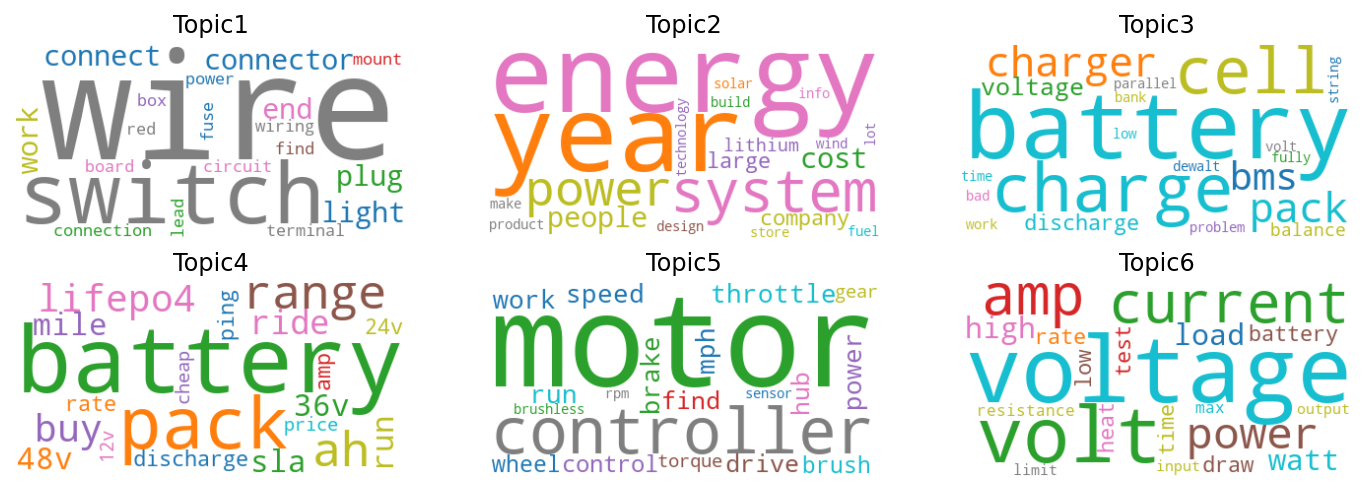

In [90]:
# import wordclouds
from wordcloud import WordCloud

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="tab10", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [12, 4]

# Create subplots for each topic
for i in range(6):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(2, 3, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.savefig('forum_topic wordclouds124.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)
plt.show()

## Dominant Topics for Each Document

In [3]:
corpus_topic_df=pd.read_csv('forum_corpus_topic_df.csv')

In [108]:
corpus_topic_df.to_csv('forum_corpus_topic_df.csv')

In [ ]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df['Post Index'] = df.index
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()


In [107]:
len(corpus_topic_df)

1287

In [45]:
dominant_topic_df = corpus_topic_df.groupby(['Dominant Topic']).agg(
    Doc_Count=('Dominant Topic', np.size)).reset_index()
dominant_topic_df['Total_Docs_Percentage']=dominant_topic_df['Doc_Count']
dominant_topic_df['Total_Docs_Percentage'] = dominant_topic_df[
    'Total_Docs_Percentage'].apply(lambda row: round((row * 100) / len(CORPUS), 2))

In [46]:
dominant_topic_df

,Dominant Topic,Doc_Count,Total_Docs_Percentage
0,1,188,14.61
1,2,223,17.33
2,3,258,20.05
3,4,224,17.40
4,5,287,22.30
5,6,107,8.31


In [12]:
labels = ['Charging Devices','Enery','Battery Management','Battery Specification','Powertrain Performance','Charging Specification']

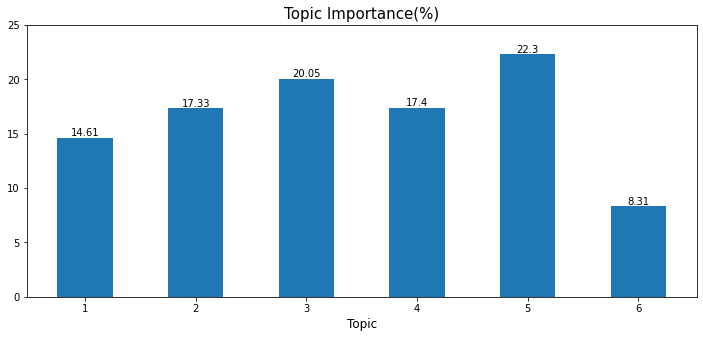

In [45]:
fig, ax = plt.subplots(figsize=(12,5))

bar_plot = plt.bar(x=[0,1,2,3,4,5],
                   height=[14.61,17.33,20.05,17.40,22.30,8.31],
                   width=.5,
                   tick_label=[i+1 for i in range(6)],
                  color=[plt.get_cmap('tab10')(0)]*6)

ax.set_title('Topic Importance(%)',
             fontdict=dict(size=15))
ax.set_xlabel('Topic',size=12)
#ax.set_xtick('labels')
#ax.set_ylabel('Average Weights(%)')


bar_label = [14.61,17.33,20.05,17.40,22.30,8.31]

plt.ylim(0, 25)


def autolabel(rects):
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.,
                1.0 * height,
                bar_label[idx],
                ha='center',
                va='bottom',
                rotation=0)


autolabel(bar_plot)

plt.savefig('forum_topic_contribution64.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)
plt.show()

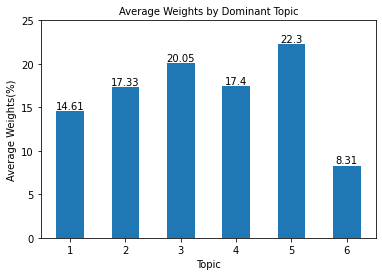

In [59]:
fig, ax = plt.subplots(figsize=(6,4))

bar_plot = plt.bar(x=dominant_topic_df['Dominant Topic'],
                   height=dominant_topic_df.Total_Docs_Percentage.values.tolist(),
                   data=dominant_topic_df,
                   width=.5,
                   tick_label=[i + 1 for i in range(6)],
                  color=[plt.get_cmap('tab10')(0)]*6)

ax.set_title('Average Weights by Dominant Topic',
             fontdict=dict(size=10))
ax.set_xlabel('Topic')
ax.set_ylabel('Average Weights(%)')


bar_label = dominant_topic_df.Total_Docs_Percentage.values.tolist()

plt.ylim(0, 25)


def autolabel(rects):
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.,
                1.0 * height,
                bar_label[idx],
                ha='center',
                va='bottom',
                rotation=0)


autolabel(bar_plot)

plt.savefig('forum_topic_contribution64.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)
plt.show()

## which document makes the highest contribution to each topic

In [10]:
corpus_topic_df.drop(['Unnamed: 0'],axis=1,inplace=True)

,Post Index,Dominant Topic,Contribution %,Topic Terms
0,0,1,42.50,"wire, switch, light, connect, connector, plug,..."
1,1,1,30.47,"wire, switch, light, connect, connector, plug,..."
2,2,1,21.31,"wire, switch, light, connect, connector, plug,..."
3,4,1,44.65,"wire, switch, light, connect, connector, plug,..."
4,5,4,30.30,"battery, pack, range, ah, lifepo4, buy, ride, ..."
...,...,...,...,...
1282,1297,4,34.92,"battery, pack, range, ah, lifepo4, buy, ride, ..."
1283,1298,3,30.79,"battery, charge, cell, charger, pack, bms, vol..."
1284,1299,1,28.21,"wire, switch, light, connect, connector, plug,..."
1285,1300,2,20.55,"energy, year, system, power, people, cost, com..."


In [11]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (
    topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])
                                                ).reset_index(drop=True)

,Post Index,Dominant Topic,Contribution %,Topic Terms
0,470,1,69.98,"wire, switch, light, connect, connector, plug,..."
1,453,2,88.67,"energy, year, system, power, people, cost, com..."
2,448,3,62.89,"battery, charge, cell, charger, pack, bms, vol..."
3,341,4,60.56,"battery, pack, range, ah, lifepo4, buy, ride, ..."
4,879,5,64.41,"motor, controller, speed, run, throttle, work,..."
5,1265,6,58.77,"voltage, volt, current, amp, power, high, load..."


In [49]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (
    topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])
                                                ).reset_index(drop=True)

,Post Index,Dominant Topic,Contribution %,Topic Terms
0,465,1,69.98,"wire, switch, light, connect, connector, plug, work, end, connection, power, circuit, find, fuse, board, terminal, wiring, lead, box, mount, red"
1,448,2,88.67,"energy, year, system, power, people, cost, company, large, lithium, product, technology, build, lot, solar, design, fuel, store, info, make, wind"
2,444,3,62.89,"battery, charge, cell, charger, pack, bms, voltage, discharge, balance, parallel, time, work, low, volt, bad, problem, string, fully, dewalt, bank"
3,337,4,60.56,"battery, pack, range, ah, lifepo4, buy, ride, mile, 36v, 48v, sla, run, discharge, ping, rate, 24v, amp, price, cheap, 12v"
4,872,5,64.41,"motor, controller, speed, run, throttle, work, power, brake, mph, drive, hub, find, control, wheel, brush, torque, gear, brushless, rpm, sensor"
5,1252,6,58.77,"voltage, volt, current, amp, power, high, load, watt, battery, rate, low, draw, test, time, heat, resistance, max, output, limit, input"


In [50]:
df_weights = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
df_weights.columns = ['Topic ' + str(i) for i in range(1,7)]
df_weights

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,0.425015,0.130237,0.100789,0.057073,0.040376,0.246509
1,0.304653,0.053149,0.054954,0.124549,0.194144,0.268552
2,0.213115,0.156648,0.149362,0.158470,0.169399,0.153005
3,0.446528,0.068750,0.081250,0.100694,0.234722,0.068056
4,0.119433,0.264283,0.207152,0.302969,0.034638,0.071525
...,...,...,...,...,...,...
1282,0.079806,0.275132,0.171076,0.349206,0.049383,0.075397
1283,0.082407,0.106019,0.307870,0.218750,0.027546,0.257407
1284,0.282051,0.166278,0.141414,0.135198,0.076923,0.198135
1285,0.144597,0.205479,0.203957,0.140030,0.132420,0.173516


In [51]:
df_weights['Year'] = year
df_weights.groupby('Year').mean()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Year,,,,,,
2007,0.153636,0.213452,0.164891,0.161851,0.145817,0.160353
2008,0.156878,0.148218,0.176791,0.188157,0.172152,0.157803
2009,0.168493,0.148230,0.170992,0.182302,0.177190,0.152794
2010,0.168016,0.151169,0.171170,0.173452,0.171084,0.165110
2011,0.179045,0.161231,0.180535,0.158660,0.160508,0.160021
2012,0.172386,0.165160,0.169157,0.162592,0.154873,0.175832
2013,0.143651,0.225149,0.241676,0.136594,0.079804,0.173127
2014,0.157876,0.184616,0.118935,0.117237,0.272629,0.148708
2015,0.171475,0.169445,0.159602,0.178830,0.168813,0.151835


In [52]:
df_weights_year=df_weights.groupby('Year').mean()

In [53]:
# df_weights_year.to_csv('df_weights_year.csv')

In [17]:
#df_weights=df_weights_year

In [54]:
df_weights['Dominant'] = df_weights.drop('Year', axis=1).idxmax(axis=1)
df_weights

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Year,Dominant
0,0.425015,0.130237,0.100789,0.057073,0.040376,0.246509,2017,Topic 1
1,0.304653,0.053149,0.054954,0.124549,0.194144,0.268552,2012,Topic 1
2,0.213115,0.156648,0.149362,0.158470,0.169399,0.153005,2018,Topic 1
3,0.446528,0.068750,0.081250,0.100694,0.234722,0.068056,2011,Topic 1
4,0.119433,0.264283,0.207152,0.302969,0.034638,0.071525,2009,Topic 4
...,...,...,...,...,...,...,...,...
1282,0.079806,0.275132,0.171076,0.349206,0.049383,0.075397,2012,Topic 4
1283,0.082407,0.106019,0.307870,0.218750,0.027546,0.257407,2013,Topic 3
1284,0.282051,0.166278,0.141414,0.135198,0.076923,0.198135,2013,Topic 1
1285,0.144597,0.205479,0.203957,0.140030,0.132420,0.173516,2013,Topic 2


In [55]:
df_dominance = df_weights.groupby('Year')['Dominant'].value_counts(normalize=True).unstack()
df_dominance

Dominant,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Year,,,,,,
2007,0.121053,0.310526,0.184211,0.131579,0.152632,0.100000
2008,0.129032,0.145161,0.214286,0.207373,0.232719,0.071429
2009,0.156863,0.149020,0.200000,0.176471,0.254902,0.062745
2010,0.153439,0.148148,0.190476,0.174603,0.227513,0.105820
2011,0.195312,0.148438,0.210938,0.148438,0.210938,0.085938
2012,0.115385,0.192308,0.134615,0.153846,0.250000,0.153846
2013,0.125000,0.375000,0.375000,NaN,NaN,0.125000
2014,0.181818,0.272727,0.090909,NaN,0.454545,NaN
2015,NaN,NaN,NaN,0.500000,0.250000,0.250000


## plot by year

In [29]:
df_weights_year=pd.read_csv("df_weights_year.csv")
df_weights_year

,Year,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,2007,0.153636,0.213452,0.164891,0.161851,0.145817,0.160353
1,2008,0.156878,0.148218,0.176791,0.188157,0.172152,0.157803
2,2009,0.168493,0.148230,0.170992,0.182302,0.177190,0.152794
3,2010,0.168016,0.151169,0.171170,0.173452,0.171084,0.165110
4,2011,0.179045,0.161231,0.180535,0.158660,0.160508,0.160021
5,2012,0.172386,0.165160,0.169157,0.162592,0.154873,0.175832
6,2013,0.143651,0.225149,0.241676,0.136594,0.079804,0.173127
7,2014,0.157876,0.184616,0.118935,0.117237,0.272629,0.148708
8,2015,0.171475,0.169445,0.159602,0.178830,0.168813,0.151835
9,2016,0.182159,0.123382,0.345793,0.124860,0.112382,0.111424


In [32]:
df_weights_year=df_weights_year.set_index(['Year'])
df_weights_year

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Year,,,,,,
2007,0.153636,0.213452,0.164891,0.161851,0.145817,0.160353
2008,0.156878,0.148218,0.176791,0.188157,0.172152,0.157803
2009,0.168493,0.148230,0.170992,0.182302,0.177190,0.152794
2010,0.168016,0.151169,0.171170,0.173452,0.171084,0.165110
2011,0.179045,0.161231,0.180535,0.158660,0.160508,0.160021
2012,0.172386,0.165160,0.169157,0.162592,0.154873,0.175832
2013,0.143651,0.225149,0.241676,0.136594,0.079804,0.173127
2014,0.157876,0.184616,0.118935,0.117237,0.272629,0.148708
2015,0.171475,0.169445,0.159602,0.178830,0.168813,0.151835


In [33]:
df_weights_year_plot=round(df_weights_year*100,2)
df_weights_year_plot

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Year,,,,,,
2007,15.36,21.35,16.49,16.19,14.58,16.04
2008,15.69,14.82,17.68,18.82,17.22,15.78
2009,16.85,14.82,17.10,18.23,17.72,15.28
2010,16.80,15.12,17.12,17.35,17.11,16.51
2011,17.90,16.12,18.05,15.87,16.05,16.00
2012,17.24,16.52,16.92,16.26,15.49,17.58
2013,14.37,22.51,24.17,13.66,7.98,17.31
2014,15.79,18.46,11.89,11.72,27.26,14.87
2015,17.15,16.94,15.96,17.88,16.88,15.18


In [56]:
df_weights_year_plot=round(df_weights_year*100,2)
df_weights_year_plot

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Year,,,,,,
2007,15.36,21.35,16.49,16.19,14.58,16.04
2008,15.69,14.82,17.68,18.82,17.22,15.78
2009,16.85,14.82,17.10,18.23,17.72,15.28
2010,16.80,15.12,17.12,17.35,17.11,16.51
2011,17.90,16.12,18.05,15.87,16.05,16.00
2012,17.24,16.52,16.92,16.26,15.49,17.58
2013,14.37,22.51,24.17,13.66,7.98,17.31
2014,15.79,18.46,11.89,11.72,27.26,14.87
2015,17.15,16.94,15.96,17.88,16.88,15.18


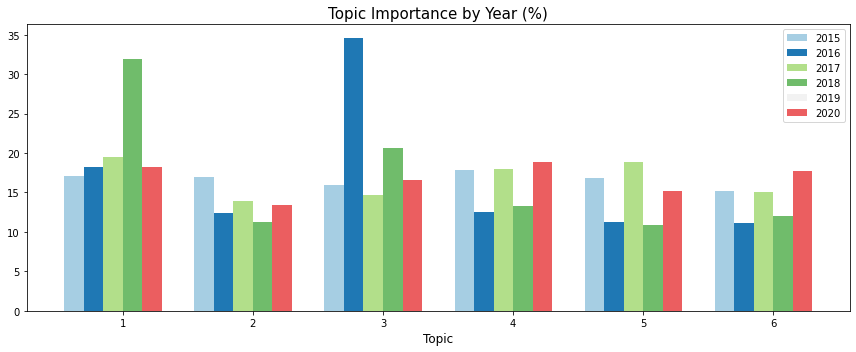

In [53]:
labels = [i+1 for i in range(6)]
y2015 = df_weights_year_plot.loc[2015].values
y2016 = df_weights_year_plot.loc[2016].values
y2017 = df_weights_year_plot.loc[2017].values
y2018 = df_weights_year_plot.loc[2018].values
y2019 = [0,0,0,0,0,0]
y2020 = df_weights_year_plot.loc[2020].values

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig=plt.figure(figsize=(12,5))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.375, y2015, width, label='2015',color=plt.cm.get_cmap('Paired')(0))
rects2 = ax.bar(x - 0.225, y2016, width, label='2016',color=plt.cm.get_cmap('Paired')(1))
rects3 = ax.bar(x-0.075, y2017, width, label='2017',color=plt.cm.get_cmap('Paired')(2))
rects4 = ax.bar(x + 0.075, y2018, width, label='2018',alpha=0.7,color=plt.cm.get_cmap('Paired')(3))
rects5 = ax.bar(x + 0.2,y2019, width, label='2019',color=plt.cm.get_cmap('Pastel1')(8))
rects6 = ax.bar(x + 0.225, y2020, width, label='2020',alpha=0.7,color=plt.cm.get_cmap('Paired')(5))



# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Average Weights of Topics(%)')
ax.set_title("Topic Importance by Year (%)", 
              fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Topic',size=12)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 6, height),
                    xytext=(6, 2),  # 3 points vertical offset
                    fontsize=10, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects6)

fig.tight_layout()

plt.show()

#fig.savefig("Frequency.png", format = 'png' )

In [55]:
fig.savefig('yearly_topic_contribution125.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0 )